## Regressão

O objetivo deste exercício é introduzir e praticar conceitos de Regressão. Para isso utilizaremos 2 bases: <i>Advertising.csv</i> e <i>Portland_housePrices.csv</i>

In [1]:
import pandas as pd

dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)
dados_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<i>Advertising</i> é um conjunto de dados relacionando o montante de vendas (<i>sales</i>) com o montante investido em marketing em diferentes médias (<i>TV</i>,<i>radio</i> e <i>newspaper</i>).

Por sua vez, <i>Portland_housePrices</i> relaciona o preço de casas com seu tamanho e número de quartos.



In [2]:
dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)
dados_por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Como treinar e usar modelos?
Para virtualmente qualquer tipo de algoritmo de Regressão, existirá uma função <i>fit</i> para treinar o modelo.

Por exemplo, para a regressão linear:

```python
 reg = LinearRegression().fit(X,y)
``` 

Onde <i> X </i> se refere aos atributos de treinamento e <i>y</i> à variável resposta.


In [3]:
from sklearn.linear_model import LinearRegression
#Treina modelo utilizando dados de tamanho para prever preco
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

reg = LinearRegression().fit(X,y)
reg

LinearRegression()

Após treinado, o modelo pode ser utilizado para fazer predições (prever <i>y</i> para novos exemplos), através da função <i>predict</i>

In [4]:
y_hat = reg.predict(X[0:4])
y_hat

array([[354311.69781212],
       [286510.95280112],
       [394131.18297731],
       [261758.29986059]])

# Regressão Linear Multivariada
A classe <i>LinearRegression</i> já está implementada de modo a funcionar com múltiplos atributos preditores.

Também é possível utilizar o método de <i>Descida de Gradiente</i> através da classe <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html'>SGDRegressor</a>:
    


In [5]:
from sklearn.linear_model import SGDRegressor
reg_grad = SGDRegressor(max_iter=5000,alpha=0) #alpha = 0 significa que o modelo nao usa regularização (a ser explicado nas próximas aulas)
reg_grad.fit(X,y.values.ravel())

SGDRegressor(alpha=0, max_iter=5000)

Text(0, 0.5, 'Preço')

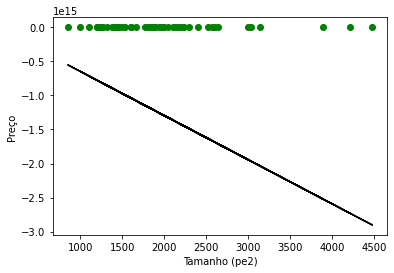

In [6]:
from matplotlib import pyplot as plt
plt.scatter(X, y,color='g')
plt.plot(X, reg_grad.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

---

<b>Entretanto</b>... o algoritmo não aprende quando os dados são usados diretamente.

<b>Por quê?</b>

A escala dos dados atrapalha o algoritmo. Tente treinar o regressor linear com descida do gradiente <i>depois de normalizar os dados de entrada</i>.

## Exercício 1

Para cada um dos conjuntos de treinamento, utilize a função <i>fit</i> múltiplas vezes considerando apenas <i>um</i> atributo preditor.

1) O modelo aprendido muda a cada vez que a função <i>fit</i> é utilizada?

2) Os modelos finais aprendidos são os mesmos da outra implementação de regressão linear?


In [7]:
from sklearn import preprocessing

In [29]:
reg_grad = SGDRegressor(max_iter=5000, alpha=0)
reg_grad_norm = SGDRegressor(max_iter=5000, alpha=0)

In [39]:
X_norm = preprocessing.scale(X)
reg_grad_norm.fit(X_norm, y.values.ravel())

SGDRegressor(alpha=0, max_iter=5000)

In [40]:
reg_grad.fit(X, y.values.ravel())

SGDRegressor(alpha=0, max_iter=5000)

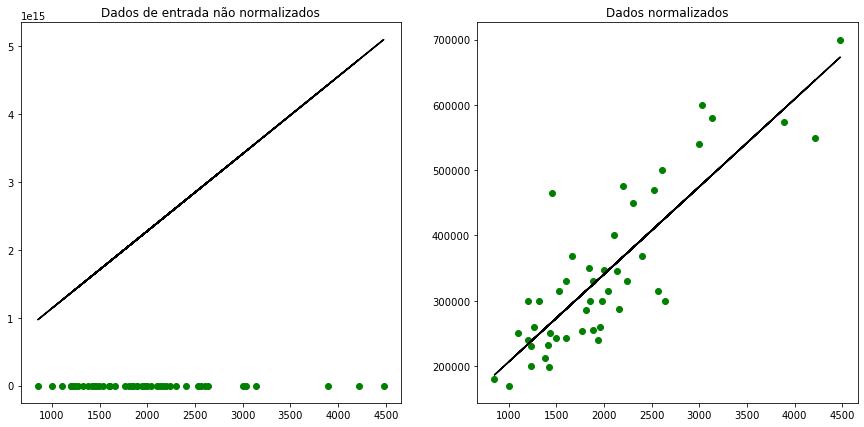

In [41]:
f, axs = plt.subplots(1, 2, sharey=False, figsize =(15,7))
axs[0].scatter(X, y, color='g')
axs[0].plot(X, reg_grad.predict(X),color='k')
axs[0].set_title('Dados de entrada não normalizados')
axs[1].scatter(X, y, color='g')
axs[1].plot(X, reg_grad_norm.predict(X_norm),color='k')
axs[1].set_title('Dados normalizados')

plt.show()

In [42]:
reg_grad.predict(X)

array([2.39599819e+15, 1.82206407e+15, 2.73307060e+15, 1.61253257e+15,
       3.41632551e+15, 2.26048596e+15, 1.74690603e+15, 1.62505891e+15,
       1.57153727e+15, 1.70135570e+15, 2.20924185e+15, 2.27756734e+15,
       2.15230394e+15, 5.09941008e+15, 1.44399636e+15, 2.61919479e+15,
       1.50321178e+15, 1.40755609e+15, 2.97107106e+15, 3.45162701e+15,
       2.01223668e+15, 2.15002642e+15, 1.82661910e+15, 2.23429453e+15,
       4.42982028e+15, 1.25268498e+15, 1.66036041e+15, 2.87655413e+15,
       2.50531897e+15, 3.00295629e+15, 2.09422727e+15, 1.13880917e+15,
       2.32311766e+15, 3.57233538e+15, 2.06234204e+15, 1.63644649e+15,
       1.41097237e+15, 2.42788341e+15, 4.79991668e+15, 2.46204616e+15,
       1.89494459e+15, 2.54859178e+15, 2.92324322e+15, 1.36656080e+15,
       9.70272958e+14, 2.10903113e+15, 1.36997708e+15])

**Resposta:**  
Toda vez que o *fit* é executado o método procura os valores que minimizam o Erro Quadrático Médio. Entretanto, o ponto de partida é aleatório gerando, com isso, um modelo diferente em cada execução. Mas, uma vez que os dados de entrada são normalizados esse comportamento já não é mais percebido.

---

## Exercício 2


Aprenda modelos utilizando todos os atributos de entrada.

1) Baseado no RSS e no R^2, é possível obter um modelo melhor utilizando todos os dados?

2) Existem atributos que poderiam ser desconsiderados sem que fosse afetada a precisão?

3) Qual implementação treina mais rápido? A com método dos mínimos quadrados ou a com descida de gradiente?


### Teste dos atributos de entrada

In [13]:
X_comp = dados_por.loc[:,['tamanho', 'quartos']]

In [14]:
reg_grad_norm2 = SGDRegressor(max_iter=5000, alpha=0)

In [15]:
X_norm2 = preprocessing.scale(X_comp)
reg_grad_norm2.fit(X_norm2, y.values.ravel())

SGDRegressor(alpha=0, max_iter=5000)

#### Comparando indicadores

In [16]:
from sklearn.metrics import r2_score
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

In [17]:
predicted = reg_grad_norm2.predict(X_norm2)
rss = calc_rss(y.values.ravel(), predicted)
r2 = calc_r2(y, predicted)
print('Utilizando todos os atributos:')
print(f'RSS = {rss}')
print(f'R2 = {r2}')

Utilizando todos os atributos:
RSS = 192091289682.4622
R2 = 0.6332448417559411


In [18]:
predicted = reg_grad_norm.predict(X_norm)
rss = calc_rss(y.values.ravel(), predicted)
r2 = calc_r2(y, predicted)
print('Utilizando apenas o tamanho:')
print(f'RSS = {rss}')
print(f'R2 = {r2}')

Utilizando apenas o tamanho:
RSS = 193469599327.2181
R2 = 0.6311013727209154


**Resposta:**  


In [19]:
dif_r2 = (calc_r2(y, reg_grad_norm2.predict(X_norm2))/calc_r2(y, reg_grad_norm.predict(X_norm)) - 1)*100
dif_rss = (calc_rss(y.values.ravel(), reg_grad_norm2.predict(X_norm2))/calc_rss(y.values.ravel(), reg_grad_norm.predict(X_norm)) - 1)*100
print(f'A diferença do R2 entre as duas abordagens é de apenas {dif_r2.round(2)}%.')
print(f'Enquanto que a diferença do RSS é {round(dif_rss, 2)}%.')
print('A princípio é difícil dizer qual abordagem é a mais adequada.')

A diferença do R2 entre as duas abordagens é de apenas 0.34%.
Enquanto que a diferença do RSS é -0.71%.
A princípio é difícil dizer qual abordagem é a mais adequada.


### Utilizando apenas o número de quartos

In [20]:
X_quartos = dados_por.loc[:,['quartos']]

In [21]:
reg_grad_norm3 = SGDRegressor(max_iter=5000, alpha=0)

In [22]:
X_norm3 = preprocessing.scale(X_quartos)
reg_grad_norm3.fit(X_norm3, y.values.ravel())

SGDRegressor(alpha=0, max_iter=5000)

In [23]:
predicted = reg_grad_norm3.predict(X_norm3)
rss = calc_rss(y.values.ravel(), predicted)
r2 = calc_r2(y, predicted)
print('Utilizando apenas o número de quartos:')
print(f'RSS = {rss}')
print(f'R2 = {r2}')

Utilizando apenas o número de quartos:
RSS = 578536366165.9415
R2 = -3.0971488774201434


**Resposta:**  

In [24]:
dif_r2 = (calc_r2(y, reg_grad_norm2.predict(X_norm2))/calc_r2(y, reg_grad_norm3.predict(X_norm3)) - 1)*100
dif_rss = (calc_rss(y.values.ravel(), reg_grad_norm2.predict(X_norm2))/calc_rss(y.values.ravel(), reg_grad_norm3.predict(X_norm3)) - 1)*100
print('Utilizando apenas o número de quartos os parâmetros RSS e R^2 foram mais descrepantes.')
print(f'Sendo {dif_r2.round(2)}% para R2 e {round(dif_rss, 2)}% para RSS.')

Utilizando apenas o número de quartos os parâmetros RSS e R^2 foram mais descrepantes.
Sendo -120.45% para R2 e -66.8% para RSS.


Como o número de quartos por si só não é um bom preditor e a inclusão dele não afeta significantemente a regressão, esse atributo pode ser desconsiderado sem perda de confiabilidade no modelo

### Testando a velocidade de processamento

In [25]:
import time

In [26]:
X_comp = dados_por.loc[:,['tamanho', 'quartos']]

Utilizando a descida de gradiente:

In [27]:
start_time = time.time()

reg_grad_norm2 = SGDRegressor(max_iter=5000, alpha=0)

X_norm2 = preprocessing.scale(X_comp)
reg_grad_norm2.fit(X_norm2, y.values.ravel())

predicted = reg_grad_norm2.predict(X_norm2)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0038166046142578125 seconds ---


Utilizando a regressão linear:

In [28]:
start_time = time.time()

reg = LinearRegression().fit(X_comp, y)

X_norm2 = preprocessing.scale(X_comp)
reg.fit(X_norm2, y.values.ravel())

predicted = reg.predict(X_norm2)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.006533145904541016 seconds ---


---

# Exercício 3

Realizar a análise da qualidade dos preditores utilizados no modelo construído.

1) Construir o plot de resíduos. Será que os resíduos estão aleatoriamente distribuídos ao redor de 0?

2) Calcular os valores p para os preditores utilizados no modelo de regressão. Utilize [esse link](https://stackoverflow.com/a/42677750) como referência. Utilizar essa técnica para selecionar variáveis preditivas. Comparar o desempenho do modelo construído a partir de variáveis preditivas com melhores valores p com um modelo que contêm todas as variáveis.


---

# Exercício 4

Realizar o teste para descobrir multicolinearidade entre variáveis preditivas;

1) Utilizando [esse link](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/) fazer o cáclulo do fator de inflação da variância (*Variance Inflation Factor - VIF*). Existe alguma evidência de multicolinearidade entre as variáveis preditivas?